In [ ]:
# !wget https://zenodo.org/record/5101018/files/litw_cleaned.tar.gz?download=1

--2022-06-28 11:43:34--  https://zenodo.org/record/5101018/files/litw_cleaned.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2135404601 (2.0G) [application/octet-stream]
Saving to: ‘litw_cleaned.tar.gz?download=1’

ned.tar.gz?download   0%[                    ]   2.32M   410KB/s    eta 85m 45s^C


In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1-7MvOzzplVGn7EcdhG745Wf3yS3JLfie/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1-7MvOzzplVGn7EcdhG745Wf3yS3JLfie
To: /content/litw_cleaned.tar.gz
100% 2.14G/2.14G [00:11<00:00, 182MB/s]


In [2]:
!tar -zxvf /content/litw_cleaned.tar.gz

Выходные данные были обрезаны до нескольких последних строк (5000).
data_cleaned/voc_format/FedEx/img000323_51.xml
data_cleaned/voc_format/FedEx/img000121_51.xml
data_cleaned/voc_format/FedEx/img000281_51.xml
data_cleaned/voc_format/FedEx/img000001_51.xml
data_cleaned/voc_format/FedEx/img000213_51.xml
data_cleaned/voc_format/FedEx/img000168_51.xml
data_cleaned/voc_format/FedEx/img000166_51.jpg
data_cleaned/voc_format/FedEx/img000365_51.jpg
data_cleaned/voc_format/FedEx/img000295_51.jpg
data_cleaned/voc_format/FedEx/img000140_51.jpg
data_cleaned/voc_format/FedEx/img000398_51.xml
data_cleaned/voc_format/FedEx/img000096_51.jpg
data_cleaned/voc_format/FedEx/img000193_51.xml
data_cleaned/voc_format/FedEx/img000167_51.jpg
data_cleaned/voc_format/FedEx/img000102_51.jpg
data_cleaned/voc_format/FedEx/img000033_51.xml
data_cleaned/voc_format/FedEx/img000126_51.jpg
data_cleaned/voc_format/FedEx/img000130_51.xml
data_cleaned/voc_format/FedEx/img000365_51.xml
data_cleaned/voc_format/FedEx/img000096

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# !cp /content/litw_cleaned.tar.gz /content/drive/MyDrive/Ad\ Detection/data

In [5]:
!git clone https://github.com/Travvy88/AdvertiseDetection

Cloning into 'AdvertiseDetection'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 37 (delta 8), reused 36 (delta 7), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [6]:
!mv data_cleaned/voc_format data_cleaned/LogoDataset

In [7]:
!mv data_cleaned litw_coco

In [8]:
!find /content/litw_coco/LogoDataset -type f -name '*.xml' > litw_coco/anno_paths.txt

In [9]:
from AdvertiseDetection.utils.data import change_to_one_class

with open('litw_coco/anno_paths.txt', 'r') as f:
    for p in f.read().split('\n')[:-1]:
        change_to_one_class(p)

In [10]:
!echo "logo" > litw_coco/brands.txt

In [11]:
!python /content/AdvertiseDetection/utils/voc2coco.py \
    --ann_paths_list /content/litw_coco/anno_paths.txt \
    --labels /content/litw_coco/brands.txt \
    --output litw_coco/coco.json \
    --ext xml

Start converting !
100% 8504/8504 [00:00<00:00, 13408.69it/s]


In [12]:
!rm -R litw_coco/brandROIs

In [13]:
!find litw_coco -name "*.xml" -type f -delete

In [14]:
import os
from tqdm.auto import tqdm

for brand in os.listdir('litw_coco/LogoDataset'):
    filenames = os.listdir(os.path.join('litw_coco/LogoDataset', brand))
    for filename in filenames:
        split = filename.split('_')
        if len(split) > 1:
            ext = split[1].split('.')[1]
            new_name = split[0] + '.' + ext
            os.rename(
                os.path.join('litw_coco/LogoDataset', brand, filename),
                os.path.join('litw_coco/LogoDataset', brand, new_name)
                )

In [16]:
import json 

with open('litw_coco/coco.json') as json_file:
    data = json.load(json_file)

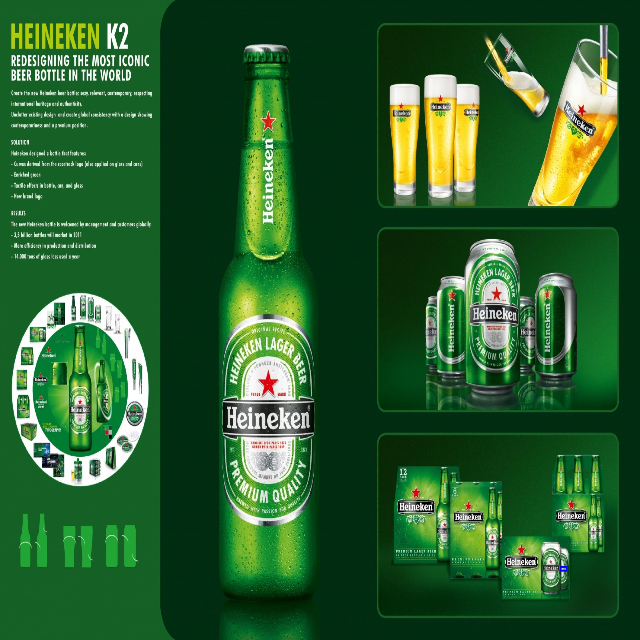

In [27]:
## проверим, что все ок 

anno = data['annotations'][849]
bbox = anno['bbox']

image = data['images'][anno['image_id']]
file_name = image['file_name']


import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('litw_coco/' + file_name)

pt1 = (bbox[0], bbox[1])
pt2 = (bbox[0] + bbox[2], bbox[1] + bbox[3])

img = cv2.rectangle(img, pt1, pt2, (255, 0, 0), 3)
img = cv2.resize(img, (640, 640))
cv2_imshow(img)

In [28]:
!zip -r litw_coco.zip litw_coco

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: litw_coco/LogoDataset/starbucks/img000186.jpg (deflated 1%)
  adding: litw_coco/LogoDataset/starbucks/img000126.jpg (deflated 0%)
  adding: litw_coco/LogoDataset/starbucks/img000212.jpg (deflated 0%)
  adding: litw_coco/LogoDataset/starbucks/img000075.jpg (deflated 1%)
  adding: litw_coco/LogoDataset/starbucks/img000071.jpg (deflated 1%)
  adding: litw_coco/LogoDataset/starbucks/img000100.jpg (deflated 0%)
  adding: litw_coco/LogoDataset/starbucks/img000178.jpg (deflated 1%)
  adding: litw_coco/LogoDataset/starbucks/img000017.jpg (deflated 1%)
  adding: litw_coco/LogoDataset/starbucks/img000088.jpg (deflated 0%)
  adding: litw_coco/LogoDataset/starbucks/img000314.jpg (deflated 3%)
  adding: litw_coco/LogoDataset/starbucks/img000228.jpg (deflated 0%)
  adding: litw_coco/LogoDataset/starbucks/img000189.jpg (deflated 0%)
  adding: litw_coco/LogoDataset/starbucks/img000138.jpg (deflated 0%)
  adding: litw_coco/Lo

In [29]:
!cp litw_coco.zip /content/drive/MyDrive/Ad\ Detection/data